In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

In [3]:
data = pd.read_csv('churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
data.shape

(10000, 14)

In [29]:
data = data.dropna()

In [30]:
data.shape

(10000, 14)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


С данными повезло, нет пустых ячеек, что встречается крайне редко. Датасет состоит из 10 тысяч строк и 14 столбцов. По порядку
- CustomerId - рандомный идентификатор, присваиваемый клиенту, естесственно не имеет никакого значения на принимаемое решение со стороны клиента. 
- Surname - Имя.
- CreditScore - склонность к кредиту. Показатель рассчитывается на стороне банка, как именно - непонятно, но это явно не вероятностное значение, так как показатели превышают 100. Логично предпложить, что человек с большей склонностью к кредиту дольше будет клиентом банка.
- Geography - регион проживания, стран всего три. В будущем промаркирую их, потому что они могут влиять на отток клиентов (например, экономический кризис в стране, безработица и тд повышают кол-во займов).
- Gender - пол, также есть смысл промаркировать.
- Age - возраст.
- Tenure - срок жизни клиента.
- Balance - остаток средств на счете клиента. Та же история, что и со склонностью к кредитам, чем выше цифра, тем меньше вероятность оттока (на первый взгляд).
- NumOfProducts - кол-во банковских продуктов у клиента.
- HasCrCard - есть ли кредитная карта. 1 - есть, 0 - нет.
- IsActiveMember - активность клиента. По данным очень сложно понять, что именно это значит, потому что клиент с тремя продуктами и хорошим остатком на счете моожет быть промаркирован как неактивный. Вполне возможно, что для этого маркера берется период (например месяц), в течение которого должна быть какая-либо активность (поступление денежных средств, транзакции по картам и тд).
- EstimatedSalary - зарплата клиента.
- Exited - отток (1 - да, 0 - нет).

In [31]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Заменю значения качественных показателей на числа. Затронет это следующие столбцы: Geography, Gender.

In [34]:
data.loc[data.Geography == 'France', 'Geography'] = 0
data.loc[data.Geography == 'Spain', 'Geography'] = 1
data.loc[data.Geography == 'Germany', 'Geography'] = 2

data.loc[data.Gender == 'Female', 'Gender'] = 0
data.loc[data.Gender == 'Male', 'Gender'] = 1

In [35]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


Проанализирую следующие столбцы подробнее.

**CreditScore**

In [38]:
print(f'среднее {statistics.mean(data.CreditScore):.2f}')
print(f'медиана {statistics.median(data.CreditScore):.2f}')
print(f'минимум {data.CreditScore.min():.2f}')
print(f'максимум {data.CreditScore.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.CreditScore):.2f}')

среднее 650.53
медиана 652.00
минимум 350.00
максимум 850.00
среднее отклонение 96.65


Уже по данным медианы и среднего я склоняюсь к нормальному распределению, но все же проверю.

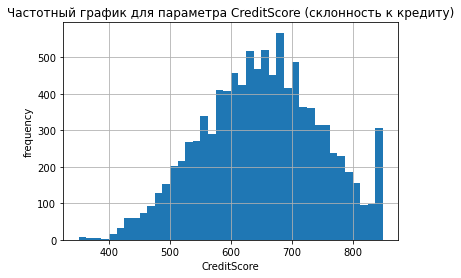

In [47]:
ax = data.CreditScore.hist(bins=40)

ax.set_xlabel('CreditScore')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра CreditScore (склонность к кредиту)')
plt.grid(True)
plt.show()

Что ж, почти 300 клиентов имеют склонность равную 850, что не дает мне говорить о нормальном распределении.

**Age**

In [42]:
print(f'среднее {statistics.mean(data.Age):.2f}')
print(f'медиана {statistics.median(data.Age):.2f}')
print(f'минимум {data.Age.min():.2f}')
print(f'максимум {data.Age.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.Age):.2f}')

среднее 38.92
медиана 37.00
минимум 18.00
максимум 92.00
среднее отклонение 10.49


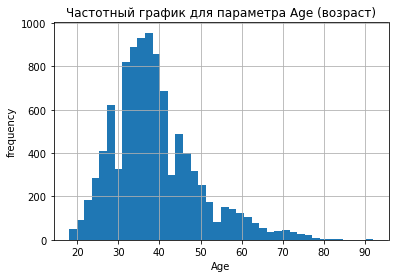

In [46]:
ax = data.Age.hist(bins=40)

ax.set_xlabel('Age')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра Age (возраст)')
plt.grid(True)
plt.show()

**Tenure**

In [43]:
print(f'среднее {statistics.mean(data.Tenure):.2f}')
print(f'медиана {statistics.median(data.Tenure):.2f}')
print(f'минимум {data.Tenure.min():.2f}')
print(f'максимум {data.Tenure.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.Tenure):.2f}')

среднее 5.01
медиана 5.00
минимум 0.00
максимум 10.00
среднее отклонение 2.89


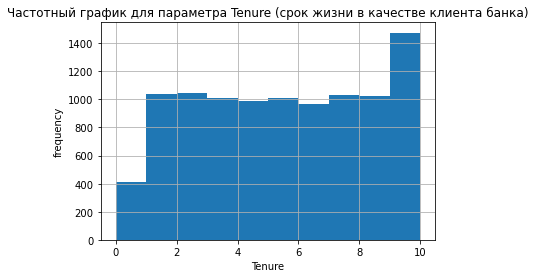

In [45]:
ax = data.Tenure.hist(bins=10)

ax.set_xlabel('Tenure')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра Tenure (срок жизни в качестве клиента банка)')
plt.grid(True)
plt.show()

**Balance**

In [48]:
print(f'среднее {statistics.mean(data.Balance):.2f}')
print(f'медиана {statistics.median(data.Balance):.2f}')
print(f'минимум {data.Balance.min():.2f}')
print(f'максимум {data.Balance.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.Balance):.2f}')

среднее 76485.89
медиана 97198.54
минимум 0.00
максимум 250898.09
среднее отклонение 62394.29


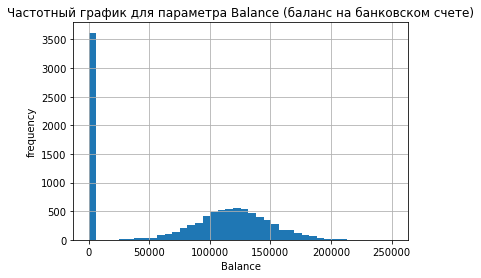

In [49]:
ax = data.Balance.hist(bins=40)

ax.set_xlabel('Balance')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра Balance (баланс на банковском счете)')
plt.grid(True)
plt.show()

Клиенты с ненулевым балансом показывают нормальное распределение, но есть одно но. Мы не можем убрать нулевых клиентов, 
## для простоты подсчетов вполне возможно стоит взять логарифм?##

**NumOfProducts**

In [51]:
print(f'среднее {statistics.mean(data.NumOfProducts):.2f}')
print(f'медиана {statistics.median(data.NumOfProducts):.2f}')
print(f'минимум {data.NumOfProducts.min():.2f}')
print(f'максимум {data.NumOfProducts.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.NumOfProducts):.2f}')

среднее 1.53
медиана 1.00
минимум 1.00
максимум 4.00
среднее отклонение 0.58


**EstimatedSalary**

In [53]:
print(f'среднее {statistics.mean(data.EstimatedSalary):.2f}')
print(f'медиана {statistics.median(data.EstimatedSalary):.2f}')
print(f'минимум {data.EstimatedSalary.min():.2f}')
print(f'максимум {data.EstimatedSalary.max():.2f}')
print(f'среднее отклонение {statistics.pstdev(data.EstimatedSalary):.2f}')

среднее 100090.24
медиана 100193.91
минимум 11.58
максимум 199992.48
среднее отклонение 57507.62


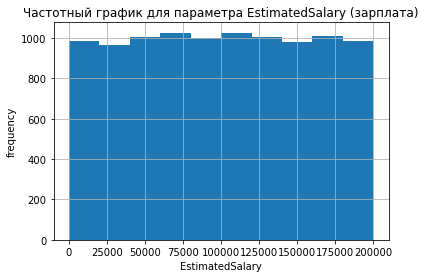

In [57]:
ax = data.EstimatedSalary.hist(bins=10)

ax.set_xlabel('EstimatedSalary')
ax.set_ylabel('frequency')
ax.set_title('Частотный график для параметра EstimatedSalary (зарплата)')
plt.grid(True)
plt.show()

## Логарифм? ##

А пока матрица корреляции без логарифмированных данных

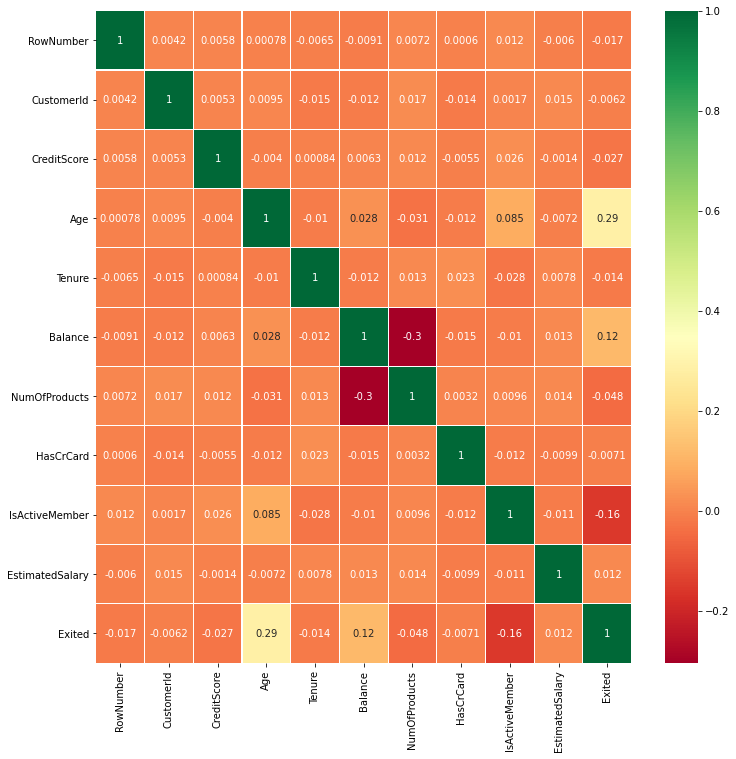

In [58]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->матрица корреляций
# gcf() - получение текущей фигуры
fig=plt.gcf()
# set_size_inches() - установить размер фигуры
fig.set_size_inches(12,12)
plt.show()